In [100]:
'''
~~~
Now just for the imaging part of it!
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m1_10_alone', 'fg3_m15_alone', 'fg3_m12_alone', 'fg1_m13_alone']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
'''
So the time covered differs for different simulations.
We want to retain this in the data.
Minor mergers are 3x as frequent.
Since galaxies merge on average w/i 1-2 Gyr a lot of this will be washed out.
Because of the frequency of most mergers a lot of this will be washed out meaning that
it is probably unrealistic to combine the simulations together.
But we do so anyway making sure we have 3x the number of minor mergers as major mergers.
So we are limited by the smallest sample size.
'''

lens=[]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    '''index_list=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0:
            index_list.append(j)
            
    df.drop(df.index[index_list], inplace=True)'''
    
    counter=0
    
    for j in range(len(df)):
        if counter > OG_length:
            break
        if add_on=='fg3_m15' or run=='fg3_m15_no_200':
            if df[['Myr']].values[counter][0]<60 and df[['Sep']].values[counter][0]==0.0 and df[['# Bulges']].values[counter][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(counter,'class label',0)
                df.drop(df.index[counter], inplace=True)
            else:
                counter+=1
        else:
            if df[['Myr']].values[counter][0]<40 and df[['Sep']].values[counter][0]==0.0 and df[['# Bulges']].values[counter][0]==1:#df[['Myr']].values[i][0]
                df.set_value(counter,'class label',0)
                df.drop(df.index[counter], inplace=True)
            else:
                counter+=1
    
    print(len(df))
    lens.append(len(df))
    
    
print('lengths', lens, min(lens[0],lens[1])) 
length=min(lens[0],lens[1])

names_df=['df1', 'df2', 'df3', 'df4']
dfs=[]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on, 'df name', names_df[i])
    

    run=list_runs[i]
    
    names_df[i] = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    names_df[i].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    names_df[i].dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    '''for j in range(len(names_df)):
        if names_df[['class label']].values[j]<1:
            print(names_df[['Image']].values[j],names_df[['Myr']].values[j][0],names_df[['class label']].values[j])

    '''
    
    counter=0
    OG_length=len(names_df[i])
    for j in range(len(names_df[i])):
        
        if add_on=='fg3_m15' or add_on=='fg3_m15_no_200':
            if names_df[i][['Myr']].values[j][0]<60 and names_df[i][['Sep']].values[j][0]==0.0 and names_df[i][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                names_df[i].set_value(j,'class label',0)
                #names_df[i].drop(names_df[i].index[counter], inplace=True)
            
        else:
            if names_df[i][['Myr']].values[j][0]<40 and names_df[i][['Sep']].values[j][0]==0.0 and names_df[i][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                names_df[i].set_value(j,'class label',0)
                #names_df[i].drop(names_df[i].index[counter], inplace=True)
            
    '''Now you need to drop the number off from the longest one'''
    if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone':
        length_limit=length/3
    else:
        length_limit=length
        
    names_df[i].dropna(how="all",inplace=True)
    
    n_drop=int(len(names_df[i])-length_limit)
    drop_indices = np.random.choice(names_df[i].index, n_drop, replace=False)
    df_subset = names_df[i].drop(drop_indices)
    print('LENGTH NOW', len(df_subset))
    dfs.append(df_subset)

new_df=dfs[0].append(dfs[1]).append(dfs[2]).append(dfs[3]) 


for j in range(len(new_df)):
    if new_df[['class label']].values[j]<1:
        print(new_df[['Image']].values[j],new_df[['Myr']].values[j][0],new_df[['class label']].values[j])


#These are the isolated galaxies:'LDA_img_ratio_statmorph_isolated.txt'
df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_isolated_no_200.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
new_df=new_df.append(df)

myr=[]
myr_non=[]
for j in range(len(new_df)):
    if new_df[['class label']].values[j][0]==0.0:
        myr_non.append(new_df[['Myr']].values[j][0])
    else:
        myr.append(new_df[['Myr']].values[j][0])

myr_non=sorted(list(set(myr_non)))
myr=sorted(list(set(myr)))





from sklearn.preprocessing import LabelEncoder


#X = new_df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
#'Clumpiness (S)',
y = new_df['class label'].values



gini_non = []
m20_non = []

C_non = []
A_non = []


n_non = []
A_S_non = []

gini = []
m20 = []

C = []
A = []


n = []
A_S = []





for l in range(len(df)):
    if new_df[['class label']].values[l]==0:

        gini_non.append(X[l,0])
        m20_non.append(X[l,1])
        C_non.append(X[l,2])
        A_non.append(X[l,3])

        A_S_non.append(X[l,5])
        n_non.append(X[l,4])
    else:
        gini.append(X[l,0])
        m20.append(X[l,1])
        C.append(X[l,2])
        A.append(X[l,3])

        A_S.append(X[l,5])
        n.append(X[l,4])

    #print('concentration here', df[['Concentration (C)']].values[i][0])

gini = {key:[] for key in myr}
m20 = {key:[] for key in myr}

C = {key:[] for key in myr}
A = {key:[] for key in myr}
S = {key:[] for key in myr}

A_S = {key:[] for key in myr}
n = {key:[] for key in myr}

gini_non = {key:[] for key in myr_non}
m20_non = {key:[] for key in myr_non}

C_non = {key:[] for key in myr_non}
A_non = {key:[] for key in myr_non}
S_non = {key:[] for key in myr_non}

n_non = {key:[] for key in myr_non}
A_S_non = {key:[] for key in myr_non}




for l in range(len(new_df)):
    if new_df[['class label']].values[l]==0 or new_df[['class label']].values[l]==0.0:
        print(new_df[['Myr']].values[l][0],new_df[['class label']].values[l])
        gini_non[new_df[['Myr']].values[l][0]].append(X[l,0])
        m20_non[new_df[['Myr']].values[l][0]].append(X[l,1])
        C_non[new_df[['Myr']].values[l][0]].append(X[l,2])
        A_non[new_df[['Myr']].values[l][0]].append(X[l,3])
        #S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        A_S_non[new_df[['Myr']].values[l][0]].append(X[l,5])
        n_non[new_df[['Myr']].values[l][0]].append(X[l,4])
        #print('concentration here', df[['Concentration (C)']].values[i][0])
    else:
        
        gini[new_df[['Myr']].values[l][0]].append(X[l,0])
        m20[new_df[['Myr']].values[l][0]].append(X[l,1])
        C[new_df[['Myr']].values[l][0]].append(X[l,2])
        A[new_df[['Myr']].values[l][0]].append(X[l,3])
        #S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        A_S[new_df[['Myr']].values[l][0]].append(X[l,5])
        n[new_df[['Myr']].values[l][0]].append(X[l,4])
G_list_all_non=[]
M20_list_all_non=[]
A_list_all_non=[]
C_list_all_non=[]
A_S_list_all_non=[]
n_list_all_non=[]
color_list_all_non=[]

G_list_all=[]
M20_list_all=[]
A_list_all=[]
C_list_all=[]
A_S_list_all=[]
n_list_all=[]
color_list_all=[]
for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all_non.append((m20_non[myr_non[k]][z]))
        G_list_all_non.append((gini_non[myr_non[k]][z]))
        C_list_all_non.append((C_non[myr_non[k]][z]))
        A_list_all_non.append((A_non[myr_non[k]][z]))
        n_list_all_non.append((n_non[myr_non[k]][z]))
        A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
        color_list_all_non.append(myr_non[k]/100)

A_S_means=[]
A_means=[]
gini_means=[]
m20_means=[]
color_means=[]
for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append((m20[myr[k]][z]))
        G_list_all.append((gini[myr[k]][z]))
        C_list_all.append((C[myr[k]][z]))
        A_list_all.append((A[myr[k]][z]))
        n_list_all.append((n[myr[k]][z]))
        A_S_list_all.append((A_S[myr[k]][z]))
        color_list_all.append((myr[k]/100))#/((t_p-t_e)/2+t_e))
    #if np.mean(gini[myr[k]][:]) > (0.14*np.mean(m20[myr[k]][:])+0.33):
    #    print('G M20 ided', myr[k]/100)
    #if np.mean(A_S[myr[k]][:]) > 0.2:
    #    print('A_S ided', myr[k]/100)
    if np.mean(A[myr[k]][:]) > 0.35:
        print('A ided', myr[k]/100)
    A_S_means.append(np.mean(A_S[myr[k]][:]))
    A_means.append(np.mean(A[myr[k]][:]))
    gini_means.append(np.mean(gini[myr[k]][:]))#-0.14*np.mean(m20[myr[k]][:]))
    m20_means.append(np.mean(m20[myr[k]][:]))
    color_means.append((myr[k]/100))
        


'''Make the beautiful list of colors'''
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for k in range(len(tableau20)):    
    r, g, b = tableau20[k]    
    tableau20[k] = (r / 255., g / 255., b / 255.)    


dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

import seaborn

import seaborn
sns.set_style("darkgrid")

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax1.scatter(m20_means, gini_means, c=color_means, cmap='Reds', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')


for j,k,l in zip(m20_means,gini_means,color_means):
    ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))
        
        
'''A = anyarray
B = anyotherarray

plt.plot(A,B)
for i,j in zip(A,B):
    ax.annotate('%s)' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    ax.annotate('(%s,' %i, xy=(i,j))'''
    
ax1.set_xlim([max(m20_means),min(m20_means)])
ax1.set_ylim([min(gini_means),max(gini_means)])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



ax1.set_title('Mergers', loc='right')
plt.savefig('../MaNGA_Papers/Paper_I/time_evo_all_gini_m20_'+str(run)+'.pdf')

plt.clf()
plt.plot(myr,A_S_means)
plt.axhline(y=0.35)
for j,k in zip(myr,A_S_means):
    plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))


plt.savefig('../MaNGA_Papers/Paper_I/time_evo_all_A_'+str(run)+'.pdf')

plt.clf()
plt.plot(myr,A_means)
for j,k in zip(myr,A_means):
    plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

plt.axhline(y=0.2)
plt.savefig('../MaNGA_Papers/Paper_I/time_evo_all_A_S_'+str(run)+'.pdf')



plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
#ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
#ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
#ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_all.pdf')

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Reds', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_all.pdf')


'''

Now for n-A_S plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, cmap='Reds', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

ax1.set_xlim([0,1])
ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'$A_S$')
ax1.set_ylabel(r'$n$')
ax1.set_aspect(1/4)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.2, ls='--', color='black')


ax2=fig.add_subplot(122)


im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'$A_S$')
ax2.set_ylabel(r'$n$')
ax2.set_aspect(1/4)
plt.axvline(x=0.2, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_all.pdf')

STOP

X_nonmerg=[]
X_merg=[]

for l in range(len(y)):
    if y[l]==0:
        X_nonmerg.append(X[l])
    else:
        X_merg.append(X[l])



from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
print('std_scale mean', std_scale.mean_)
print('std_scale var', np.sqrt(std_scale.var_))
    
print(y[0:5])
X = std_scale.transform(X)
print(X[0:5])

n_params=6


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.75,0.25], store_covariance=True)#store_covariance=False



X_lda_sklearn = sklearn_lda.fit_transform(X, y)
#print('predictsions', X_lda_sklearn)
dec = sklearn_lda.score(X,y)
prob = sklearn_lda.predict_proba(X)

coef = sklearn_lda.coef_
inter = sklearn_lda.intercept_
class_label = sklearn_lda.classes_
cov = sklearn_lda.covariance_

#print('covariance LDA', cov)



print('coef stand alone', coef)

'''adding in a section to actually test a galaxy'''
X_gal = [[0.562098854190755,-2.0047344485315897,
         3.518338817199331,0.05954215159332954,
         1.357,0.057142857],
         [0.562098854190755,-2.0047344485315897,
         1.518338817199331,0.05954215159332954,
         1.357,0.057142857],
         [0.6048765935043497,-1.1239109246696275,
          1.365753065935824,0.6683389242149403,
          1.5499,0.48453608],
        [0.6020378718157088,-2.507254136663051,
         4.709500635785499,0.05257676639428181,
         15.863,0.16793893]]

feature_dict2 = {i:label for i,label in zip(
            range(12),
              ('Counter',
              'ID',
              'Merger?',
              '# Bulges',
               'Sep',
               'Flux Ratio',
              'Gini',
              'M20',
              'Concentration (C)',
              'Asymmetry (A)',
              'Clumpiness (S)',
              'Sersic N',
              'Shape Asymmetry (A_S)'))}

df2 = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_statmorph_Fu_mergers.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
    ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

df2.columns = [l for i,l in sorted(feature_dict2.items())] + ['Shape Asymmetry']

df2.dropna(how="all", inplace=True) # to drop the empty line at file-end



X_gal = df2[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
#'Clumpiness (S)',
X_gal = std_scale.transform(X_gal)
print(sklearn_lda.predict(X_gal))
print(sklearn_lda.predict_proba(X_gal))


pred = sklearn_lda.predict(X)



#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)






'''Run keras deep learning model'''
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense



from keras.layers import Convolution2D, MaxPooling2D
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(n_params,)))
# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(2, activation='sigmoid'))

    # 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras import utils as np_utils
#print(list(y_train-1), np.shape(list(y_train-1)))
y_train = np_utils.to_categorical(list(y_train-1), 2)
y_test = np_utils.to_categorical(list(y_test-1), 2)
#print(y_train)



model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)
print('score', score)
y_pred = model.predict(X_test)






from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))


kf.get_n_splits(X, y)



coef_list=[]
inter_list=[]
confusion_master=[]
y_test_master=[]
pred_master=[]
count=0
for train_index, test_index in kf.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    sklearn_lda = LDA( priors=[0.75,0.25],store_covariance=True)#store_covariance=False
    #priors=[0.1,0.9],


    X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    #print('coef kfold', coef)
    coef_list.append(coef)
    inter_list.append(inter)



    pred =sklearn_lda.predict(X_test)

    '''def predict_with_cutoff(colname, y_prob, df):
        n_events = df[colname].values
        event_rate = sum(n_events) / float(df.shape[0]) * 100
        threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
        print "Cutoff/threshold at: " + str(threshold)
        y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
        return y_pred'''

    '''plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()'''

    confusion_master.append(confusion_matrix(pred,y_test))
    pred_master.append(pred)
    y_test_master.append(y_test)

    count+=1


print('~~~~~Stratified K-fold validation means  ~~~~~~')
print(np.mean(coef_list, axis=0))
print(np.mean(inter_list, axis=0))
print('~~~~~Stratified K-fold validation STD ~~~~~~')
print(np.std(coef_list, axis=0))
print(np.std(inter_list, axis=0))







print('~~~~~Comparing to last run~~~~~')
print(coef)
print(inter)

print('~~~~~Master Confusion~~~~~')
'''print(confusion_master)
print(np.shape(confusion_master))'''
master=np.mean(confusion_master, axis=0).transpose()
print(master)
print(master[1][0])#row, then column
print('~~~Accuracy~~~')
print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
print('~~~Precision~~~')
print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
print('~~~Recall~~~')
print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
print('~~~F1~~~')
print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)

print('before transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))))

print('after transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose())
plt.clf()
fig=plt.figure()#figsize=(6,6)
plot_confusion_matrix((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose(), sklearn_lda.classes_, title='Normalized Confusion Matrix')
plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_all_Marvin.pdf')
#This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
plt.clf()
sns.set_style("darkgrid")




print('mean accuracy',dec)#mean accuracy on the given test data and labels.

print(inter)



X_lda_sklearn = sklearn_lda.fit_transform(X, y)
#coef = sklearn_qda.coef_
#inter = sklearn_qda.intercept_
print(dec_qda)#mean accuracy on the given test data and labels.

'''Make a histogram'''
from scipy import stats
import seaborn as sns

X_lda_1=[]
X_lda_2=[]
for j in range(len(X_lda_sklearn)):
    if y[j] ==1:
        X_lda_1.append(X_lda_sklearn[j][0])
    else:
        X_lda_2.append(X_lda_sklearn[j][0])
input_hist=X_lda_sklearn


plt.clf()
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111)
ax.hist(X_lda_1, label='Nonmerger',  color=sns.xkcd_rgb["sky blue"], normed=1)
ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.85,normed=1)



ax.set_xlabel('LD1', size=25)
#ax.set_title('Histogram #%s' %str(cnt+1), size=20)

# hide axis ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

ax.set_ylabel('Relative Count', size=25)


plt.legend(loc="upper right", fontsize=20)
#fig.tight_layout() 
#plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
#plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
#frame1 = plt.gca()


#plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
#plt.clf()

'''Also, making those mountain plots for the imaging runs'''



'''Now measure LD1 for every row and then plot that'''
import seaborn as sns


n_params=6



#coef is how you get the eigvecs (doesn't matter what slope offset is)
#print('real eigvecs',(eigvec_sc.real))
#print(len(X_lda[:,0].real[y==2]))#[y == label]
xs=[]
LDA1=[]
'''if run=='fg3_m15':
    myr=[5,30,60,100,120,150,180,200,210,240,270,300,320,340,360,400,420]
    myr_non=myr#[5,100,200]
if run=='fg3_m_12':
    myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
    myr_non=[5,200]
if run=='fg3_m12':
    myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,200,205,210,220,225,230,240,250,260]
    myr_non=[5,100,200]
if run=='fg1_m13':
    myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=myr_non
if run=='fg1_m_13':
    myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=[5,200]
if run=='all':
    myr=[5,10,20,30,40,50,60,70,80,90,100,120,130,140,150,160,170,180,185,190,195,200,205,210,
         215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350, 360, 400,410, 420,
        700,800,900,1000,1100]
    myr_non=myr
if run=='fg3_m1_10':
    myr=[5,30,40,60,90,100,120,150,180,200,300,400,410,420,
        700,800,900,1000,1100]
    myr_non=myr#[5,100,200]'''
my_lists = {key:[] for key in myr}
my_lists_non = {key:[] for key in myr_non}
my_lists_none = []
my_lists_merg = []
separations = {key:[] for key in myr}



for i in range(len(new_df)):
    if new_df[['class label']].values[i]==0:
        my_lists_none.append(X_lda_sklearn[i][0])
        my_lists_non[new_df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        continue
    if new_df[['class label']].values[i]==1:
        my_lists_merg.append(X_lda_sklearn[i][0])

        my_lists[new_df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])

    separations[new_df[['Myr']].values[i][0]].append(new_df[['Sep']].values[i][0])
    L=X_lda_sklearn[i][0]
    #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
    LDA1.append(L)
    xs.append(new_df[['Myr']].values[i][0])

#print(mean(my_lists[180]))
mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
print('DECISION BOUNDARY', mean_non, run)




means=[]
std=[]
separation_value=[]
myr_here=[]
for i in range(len(myr)):
    if math.isnan(np.mean(my_lists[myr[i]])):
        separation_value.append(999)
        continue
    else:
        if np.std(my_lists[myr[i]])==0 or np.std(my_lists[myr[i]])< 0.01*np.mean(my_lists[myr[i]]):
            continue
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
        myr_here.append(myr[i])

means=np.array(means)
std=np.array(std)
myr=np.array(myr_here)

means_non=[]
std_non=[]
myr_here_non=[]
for i in range(len(myr_non)):
    '''if math.isnan(np.mean(my_lists_non[myr_non[i]])):

        continue
    else:'''
    if np.std(my_lists_non[myr_non[i]])==0 or np.std(my_lists_non[myr_non[i]])< 0.01*np.mean(my_lists_non[myr_non[i]]):
        continue
    means_non.append(np.mean(my_lists_non[myr_non[i]]))
    std_non.append(np.std(my_lists_non[myr_non[i]]))
    myr_here_non.append(myr_non[i])

means_non=np.array(means_non)
std_non=np.array(std_non)
myr_non=np.array(myr_here_non)

print(myr, std)

'''delete places where there is only one point'''
print('black line', mean_non)

plt.axvline(x=mean_non, color='black')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/Hist_statmorph_Marvin.pdf')
plt.clf()
plt.clf()
fig = plt.figure(figsize=(18,6))

print('means',means)

if run=='fg1_m13':
    '''Try to replot with a dimensionless y axis with just means and std'''
    rescale_y_mean=0#-1.7583e-01
    rescale_y_pm=7.13475416061/2

    new_means=np.array([(x-rescale_y_mean) for x in means])

    plt.clf()

    plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
    plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])

    new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
    plt.plot(myr_non/100, new_means_non, color='blue')
    plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')

    #plt.axvline(x=220/100, color='black', ls='--')
    plt.axvline(x=215/100, color='black', ls='--')
    plt.axvline(x=280/100, color='black', ls='--')


    plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
    plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
    plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
    plt.annotate('Post Coalescence', xy=(2.9,max(new_means+std)-0.2), size=20)


if run=='fg3_m12' or run=='fg3_m12_alliso':

    '''Try to replot with a dimensionless y axis with just means and std'''
    rescale_y_mean=0#2.7636e-01
    rescale_y_pm=5.5684302120/2


    new_means=np.array([(x-rescale_y_mean) for x in means])
    new_means_non=np.array([(x-rescale_y_mean) for x in means_non])

    plt.clf()

    plt.plot(myr/100, new_means, color='red')
    plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')

    plt.plot(myr_non/100, new_means_non, color='blue')
    plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')

    plt.axvline(x=220/100, color='black', ls='--')
    plt.axvline(x=180/100, color='black', ls='--')



    plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
    plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
    plt.annotate('Late', xy=(2.1,max(new_means+std)-0.2),size=20)
    plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
if run=='fg3_m15' or run=='fg3_m15_alliso':

    '''Try to replot with a dimensionless y axis with just means and std'''
    rescale_y_mean=0#2.7636e-01
    rescale_y_pm=5.5684302120/2


    new_means=np.array([(x-rescale_y_mean) for x in means])



    plt.clf()

    plt.plot(myr/100, new_means, color='green')
    plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='green')


    new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
    plt.plot(myr_non/100, new_means_non, color='blue')
    plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')

    plt.axvline(x=360/100, color='black', ls='--')
    plt.axvline(x=180/100, color='black', ls='--')


    plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
    plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
    plt.annotate('Late', xy=(1.9,max(new_means+std)-0.2), size=20)
    plt.annotate('Post Coalescence', xy=(3.62,max(new_means+std)-0.2),  size=20)
if run=='all':

    '''Try to replot with a dimensionless y axis with just means and std'''
    rescale_y_mean=0#2.7636e-01

    new_means=np.array([(x-rescale_y_mean) for x in means])

    plt.clf()

    plt.plot(myr/100, new_means, color='green')
    plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='green')

    new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
    plt.plot(myr_non/100, new_means_non, color='blue')
    plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')


    plt.axvline(x=270/100, color='black', ls='--')
    plt.axvline(x=180/100, color='black', ls='--')



    plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
    plt.annotate('Early', xy=(1.5,0.97), size=20)

    plt.annotate('Late', xy=(1.9,0.97), size=20)
    plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
if run=='fg3_m1_10' or run=='fg3_m1_10_alliso':

    '''Try to replot with a dimensionless y axis with just means and std'''
    rescale_y_mean=0#2.7636e-01

    new_means=np.array([(x-rescale_y_mean) for x in means])

    plt.clf()

    plt.plot(myr/100, new_means, color='purple')
    plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='purple')

    new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
    plt.plot(myr_non/100, new_means_non, color='blue')
    plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')

    plt.axvline(x=900/100, color='black', ls='--')
    plt.axvline(x=410/100, color='black', ls='--')
    plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
    plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)

    plt.annotate('Late', xy=(5,max(new_means+std)-0.2), size=20)
    plt.annotate('Post Coalescence', xy=(9.1,max(new_means+std)-0.2), size=20)
#plt.ylim([-1,1])
rescale_y_mean=0#2.7636e-01

new_means=np.array([(x-rescale_y_mean) for x in means])
plt.plot(myr/100, new_means, color='purple')
plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='purple')

new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
plt.plot(myr_non/100, new_means_non, color='blue')
plt.fill_between(myr_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')

#plt.axvline(x=900/100, color='black', ls='--')
#plt.axvline(x=410/100, color='black', ls='--')
plt.annotate('All Combined', xy=(0.02,1.02), xycoords='axes fraction', size=20)
plt.xlim([min(myr)/100,max(myr)/100])
frame1 = plt.gca()
plt.tick_params(axis='both', which='major', labelsize=15)

#frame1.axes.yaxis.set_ticklabels([])
plt.axhline(y=mean_non, color='black')
plt.xlabel(r'Merger Timeline [Gyr]', size=20)
plt.ylabel(r'Detection Sensitivity (LD1)', size=20)
plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_statmorph_Marvin.pdf')



'''Try to replot with a dimensionless y axis with just means and std'''


#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



run fg3_m1_10_alone
85
run fg3_m15_alone
91
run fg3_m12_alone


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:231: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


133
run fg1_m13_alone
159
lengths [85, 91, 133, 159] 85
run fg3_m1_10_alone df name df1
LENGTH NOW 85
run fg3_m15_alone df name df2


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:283: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


LENGTH NOW 85
run fg3_m12_alone df name df3
LENGTH NOW 29
run fg1_m13_alone df name df4
LENGTH NOW 29
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5 [0]
['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_00

NameError: name 'STOP' is not defined

In [74]:
#print(new_df)
for j in range(len(new_df)):
    
    if float(new_df[['Myr']].values[j][0])<60 and new_df[['Sep']].values[j][0]==0.0 and new_df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
        print(new_df[['class label']].values[j][0],new_df[['# Bulges']].values[j][0],new_df[['Sep']].values[j][0],new_df[['Image']].values[j],new_df[['Myr']].values[j][0])

0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 40
0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 40
0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 40
0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 40
0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 40
0 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 5
1 1 0.0 ['q0.1_fg0.3_BT0.2_allrx10_sun

done


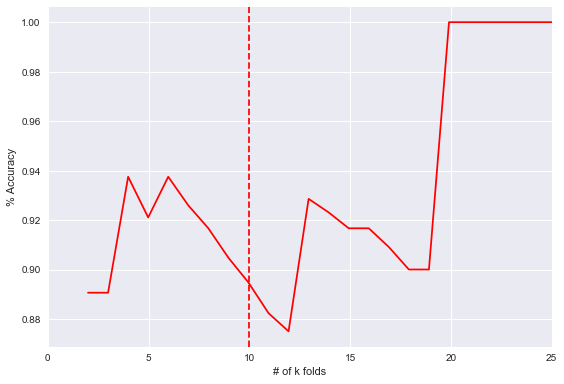

In [4]:
print('done')

plt.clf()
plt.plot(k, avg_dec_0, color='red')

plt.xlabel(r'# of k folds')
plt.ylabel(r'% Accuracy')
plt.axvline(x=10, color='red', ls='--')
plt.xlim([0,25])
plt.tight_layout()
plt.show()

In [5]:
'''
A bootstrap method to determine errors by dropping each galaxy individually
'''


'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
add_on='fg1_m13'#,'fg1_m13']#,'fg1_m13']

run=add_on
c_0=[]
c_1=[]
c_2=[]
c_3=[]
c_4=[]
c_5=[]
c_6=[]


for kz in range(len(df)):
    df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end

    df.drop(df.index[kz])
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)



    from sklearn.preprocessing import LabelEncoder

    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.06])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    c_0.append(coef[0][0])
    c_1.append(coef[0][1])
    c_2.append(coef[0][2])
    c_3.append(coef[0][3])
    c_4.append(coef[0][4])
    c_5.append(coef[0][5])
    c_6.append(coef[0][6])
    
'''Now run the full out analysis please'''    
df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

for j in range(len(df)):
    if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
        df.set_value(j,'class label',0.0)



from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


n_params=7


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.94,0.06])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
prob = sklearn_lda.predict_proba(X)

coef = sklearn_lda.coef_
print(coef)
print(np.mean(c_0),np.std(c_0))
print(np.mean(c_1),np.std(c_1))
print(np.mean(c_2),np.std(c_2))
print(np.mean(c_3),np.std(c_3))
print(np.mean(c_4),np.std(c_4))
print(np.mean(c_5),np.std(c_5))
print(np.mean(c_6),np.std(c_6))




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-06bfcc9bd58f>", line 64, in <module>
    sep='\t'
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 709, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 449, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 818, in __init__
    self._make_engine(self.engine)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 1049, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", lin

FileNotFoundError: File b'LDA_img_ratio_fg1_m13_early_late_all_things.txt' does not exist

run fg3_m12
[1. 5. 0. 1. 0.]
[ 1. 10.  0.  1.  0.]
[ 1. 20.  0.  1.  0.]
[ 1. 30.  0.  1.  0.]
[1. 5. 1. 1. 0.]
[ 1. 10.  1.  1.  0.]
[ 1. 20.  1.  1.  0.]
[ 1. 30.  1.  1.  0.]
[1. 5. 2. 1. 0.]
[ 1. 10.  2.  1.  0.]
[ 1. 20.  2.  1.  0.]
[ 1. 30.  2.  1.  0.]
[1. 5. 3. 1. 0.]
[ 1. 10.  3.  1.  0.]
[ 1. 20.  3.  1.  0.]
[1. 5. 4. 1. 0.]
[ 1. 10.  4.  1.  0.]
[ 1. 20.  4.  1.  0.]
[ 1. 30.  4.  1.  0.]
[1. 5. 5. 1. 0.]
[ 1. 10.  5.  1.  0.]
[ 1. 20.  5.  1.  0.]
[ 1. 30.  5.  1.  0.]
[1. 5. 6. 1. 0.]
[ 1. 10.  6.  1.  0.]
[ 1. 20.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.70978658 -0.79113272  4.42303291 ...  0.34526739  2.9482
   0.35841947]
 [ 0.76440784 -0.84553525  4.3461586  ...  0.34911774  2.7168
   0.36333205]
 [ 0.71709391 -2.65401726  4.51544993 ...  0.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)



shape X_qda_sklearn ()
0.9947916666666666


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

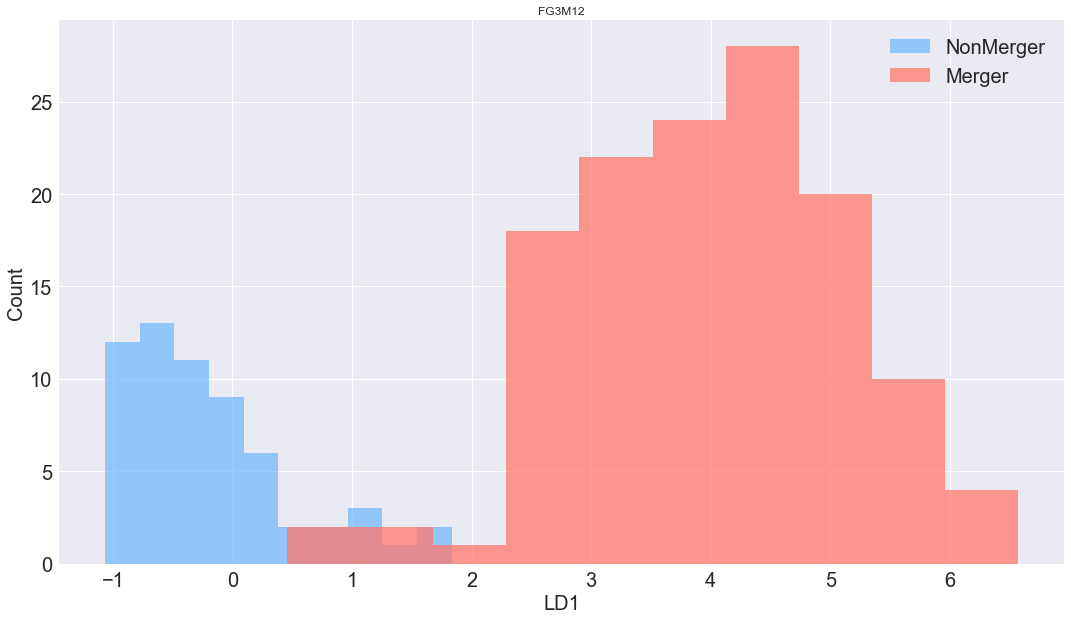

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]
     class label
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             0
13             0
14             0
15             0
16             1
17             1
18             1
19             1
20             1
21             1
22             1
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
162            0
163            0
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183      

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



[ 1. 10.  5.  1.  0.]
[ 1. 10.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.61020128 -1.84076285  2.72034022 ...  0.03551586  0.8552
   0.07418257]
 [ 0.61313577 -1.86532189  2.79654005 ...  0.12571824  0.8864
   0.16252166]
 [ 0.72319029 -1.57674979  2.82135715 ...  0.23993998  0.5103
   0.47637   ]
 ...
 [ 0.69359342 -1.83051587  2.72034022 ...  0.0593231   0.8355
   0.04984751]
 [ 0.71240611 -1.788465    2.72034022 ...  0.08271237  0.9579
   0.04851613]
 [ 0.72429504 -1.88212437  3.01029996 ...  0.30658355  1.6703
   0.08324348]]
X after norm [[-2.03854239  0.12943664 -1.51599442 ... -1.48483818 -1.21993582
  -0.9141491 ]
 [-1.99062564  0.08372735 -1.41401758 ... -0.7766804  -1.16793862
  -0.53664549]
 [-0.19356923  0.6208176  -1.38080532 ...  0.12004773 -1.794

<Figure size 576x396 with 0 Axes>

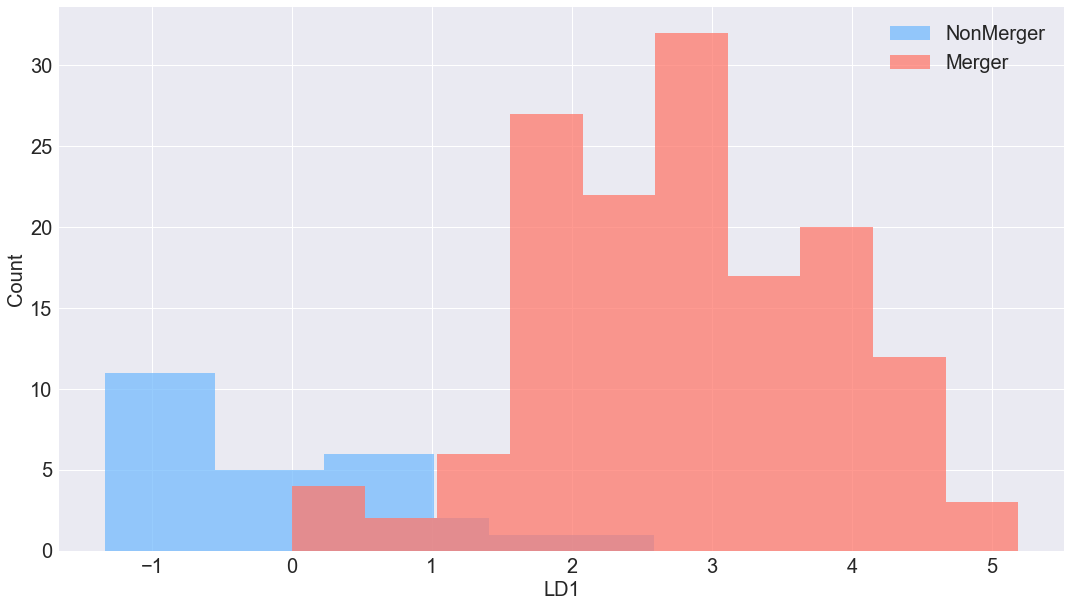

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
     class label
0              0
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             1
13             1
14             1
15             1
16             1
17             1
18             1
19             1
20             1
21             1
22             0
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185      

In [34]:
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    print('X before norm', X)

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    print('X after norm', X)

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    print('~~~Coefficients and Intercepts~~~')
    print(coef,inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.9,0.1])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    print('shape X_lda_sklearn', np.shape(X_lda_sklearn))
    print('shape X_qda_sklearn', np.shape(X_qda_sklearn))
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    my_lists_non = []
    separations = {key:[] for key in myr}

    print(df[['class label']])
    #STOP
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])

    #print(mean(my_lists[180]))
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        myr_plot=np.linspace(myr_non[i]/100,myr_non[i]/100,len(my_lists_none[myr_non[i]]))
        #np.full((3, 5), 7) that last value is your fill
        plt.scatter(myr_plot,my_lists_none[myr_non[i]], color=tableau20[i])
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



In [3]:
'''
Now trying to do the same thing for different viewing angles
'''
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m15','fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    if run=='fg3_m15':
        plt.tilte('FG3M15')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m15':
        myr=[320,340,360,400,420]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
        
    myr_non=[0,1,2,3,4,5,6]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    myr_lists_none = {key:[] for key in myr_non}
    
    
    my_lists_non = []
    separations = {key:[] for key in myr}

    
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Viewpoint']].values[i][0]].append(X_lda_sklearn[i][0])
            myr_lists_none[df[['Viewpoint']].values[i][0]].append(df[['Myr']].values[i][0]/100)
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        print('viewpoint', i, 'color', tableau20[i])
        print('xs',myr_lists_none[i])
        print('ys',my_lists_none[i])
        plt.scatter(myr_lists_none[i],my_lists_none[i], color=tableau20[i], label='Viewpoint '+str(i))
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.legend()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_view_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')




run fg3_m15


FileNotFoundError: File b'LDA_img_ratio_fg3_m15_early_late_all_things.txt' does not exist

In [39]:
'''This section is for testing if the LDA is sensitive to priors'''



prior_1=np.linspace(0,1,101)
print('prior_1', prior_1)
#this is fraction nonmerg

acc_12=[]
fp_12=[]
fn_12=[]


for i in range(len(prior_1)):
   
    add_on='fg3_m12'#'fg3_m12'
    print('run', add_on)


    run=add_on
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if add_on=='fg3_m15':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0.0)
        else:
            if add_on=='fg3_m1_10':
                
                if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

                    df.set_value(j,'class label',0.0)
            else:
                if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                    df.set_value(j,'class label',0.0)
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=6


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    '''sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_'''
    
    '''New method'''
    from sklearn.model_selection import KFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X)
   
    
    
    
    confusion_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]], store_covariance=True)#store_covariance=False
    
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        
        confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
        
        
    print(prior_1[i],1-prior_1[i])
    print(np.mean(confusion_master, axis=0))
    new_conf=np.mean(confusion_master, axis=0)
    #print(new_conf[0][0], new_conf[1][1])
    accuracy=(new_conf[0][0]+new_conf[1][1])/(np.sum(new_conf))
    
    
   
    #print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    acc_12.append(accuracy)
    fp_12.append(new_conf[0][1]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))
    fn_12.append(new_conf[1][0]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))


prior_1 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
run fg3_m12
0.0 1.0
[[ 0.   0. ]
 [ 6.1 13.1]]
run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:401: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:406: RuntimeWarning: divide by zero encountered in log
  np.log(self.priors_))


0.01 0.99
[[ 5.   0.1]
 [ 1.1 13. ]]
run fg3_m12
0.02 0.98
[[ 5.4  0.2]
 [ 0.7 12.9]]
run fg3_m12
0.03 0.97
[[ 5.6  0.2]
 [ 0.5 12.9]]
run fg3_m12
0.04 0.96
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.05 0.95
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.06 0.94
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.07 0.9299999999999999
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.08 0.92
[[ 5.8  0.3]
 [ 0.3 12.8]]
run fg3_m12
0.09 0.91
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.1 0.9
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.11 0.89
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.12 0.88
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.13 0.87
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.14 0.86
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.15 0.85
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.16 0.84
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.17 0.83
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.18 0.8200000000000001
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.19 0.81
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.2 0.8
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_

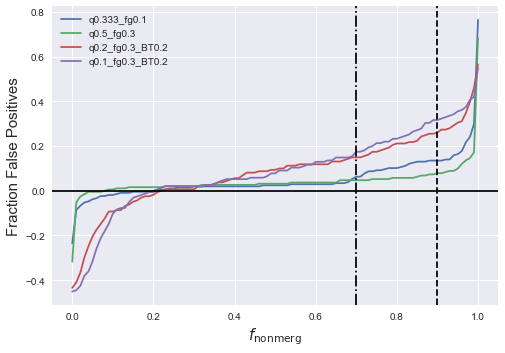

In [80]:
plt.clf()
plt.plot(prior_1, np.array(fp_13)-np.array(fn_13),  label='q0.333_fg0.1')
plt.plot(prior_1, np.array(fp_12)-np.array(fn_12),  label='q0.5_fg0.3')
plt.plot(prior_1, np.array(fp_15)-np.array(fn_15),  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, np.array(fp_10)-np.array(fn_10),  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('Fraction False Positives', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.show()

In [51]:



plt.clf()
plt.plot(prior_1, acc_13,  label='q0.333_fg0.1')
plt.plot(prior_1, acc_12,  label='q0.5_fg0.3')
plt.plot(prior_1, acc_15,  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, acc_10,  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('LDA Accuracy', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.legend()
plt.xlim([0,1])
#plt.show()
plt.savefig('../MaNGA_Papers/Paper_I/insensitive_to_priors.pdf')



In [88]:
import math
import numpy as np

fg3_m12_eig=[4.3,-0.7,1.4,3.2,-2.2,2.5,1.8]
fg1_m13_eig=[3.0,-1.7,3.9,3.7,-2.7,-0.2,1.1]
fg3_m15_eig=[14.0, -1.0, 24.4, 9.7, -14.0, -6.0, 6.2]

list_names=[fg3_m12_eig,fg1_m13_eig,fg3_m15_eig]
act_names=['q0.5_fg0.3','q0.333_fg0.1', 'q0.2_fg0.3']
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)


q0.5_fg0.3 vs q0.5_fg0.3 0.0
q0.5_fg0.3 vs q0.333_fg0.1 35.00562395799082
q0.5_fg0.3 vs q0.2_fg0.3 48.159754311711765
q0.333_fg0.1 vs q0.5_fg0.3 35.00562395799082
q0.333_fg0.1 vs q0.333_fg0.1 0.0
q0.333_fg0.1 vs q0.2_fg0.3 22.585970746417956
q0.2_fg0.3 vs q0.5_fg0.3 48.159754311711765
q0.2_fg0.3 vs q0.333_fg0.1 22.585970746417956
Domain error q0.2_fg0.3 vs q0.2_fg0.3
q0.2_fg0.3 vs q0.2_fg0.3 22.585970746417956


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.8,0.2])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
print(X_lda_sklearn)
coef = sklearn_lda.coef_
inter = sklearn_lda.intercept_
print(dec)
print(coef)
print(inter)

#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

[[-1.24905461]
 [-1.68091976]
 [ 6.11884828]
 [ 5.47198309]
 [ 4.60309771]
 [ 4.87954727]
 [ 4.17413156]
 [ 2.41719754]
 [ 2.97902972]
 [ 3.25976892]
 [ 3.36865114]
 [ 3.5545208 ]
 [ 3.75685733]
 [ 3.84589582]
 [-1.54500051]
 [-1.42974055]
 [ 4.22642622]
 [ 3.33484153]
 [ 3.81751928]
 [ 3.06943415]
 [ 3.27857911]
 [ 2.3236804 ]
 [ 4.03394623]
 [ 4.21368238]
 [ 3.49088418]
 [ 3.57496975]
 [ 3.95586172]
 [ 3.37118699]
 [-1.58020943]
 [-0.89848461]
 [ 4.14912498]
 [ 4.82284989]
 [ 3.81352123]
 [ 3.91659071]
 [ 3.85951445]
 [ 2.34015896]
 [ 2.63493089]
 [ 3.07472385]
 [ 3.9168378 ]
 [ 3.29674971]
 [ 3.6968283 ]
 [ 2.42648068]
 [-1.70062429]
 [-1.08279531]
 [ 4.64566041]
 [ 2.53592523]
 [ 3.69385845]
 [ 4.23612936]
 [ 4.19900727]
 [ 2.78530766]
 [ 4.36577064]
 [ 4.67723876]
 [ 4.62902936]
 [ 2.9028692 ]
 [ 3.9237619 ]
 [ 2.82556094]
 [-0.6409273 ]
 [-0.12130954]
 [ 5.06461006]
 [ 4.92248169]
 [ 2.81614121]
 [ 5.44111939]
 [ 3.62730409]
 [ 4.05635161]
 [ 3.83527829]
 [ 4.03960082]
 [ 3.73802

In [49]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=0 * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [49]:
'''
This is to test how sensitive or insensitive the process is to the priors
Priors vary:
Lotz2011 f_merg = 15%

'''

'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12']#,'fg1_m13']#,'fg1_m13']
prior_list=[[0.94,0.06],[0.85,0.15],[0.06,0.94],[0.999,0.001],[0.001,0.999]]

for k in range(len(prior_list)):
    for i in range(len(list_runs)):
   
        add_on=list_runs[i]
        print('run', add_on)


        run=list_runs[i]
        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
        df.dropna(how="all", inplace=True) # to drop the empty line at file-end

        for j in range(len(df)):
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0.0)



        from sklearn.preprocessing import LabelEncoder


        X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

        from sklearn import preprocessing

        #print('X before norm', X)

        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)
        #print('X after norm', X)

        n_params=7


        y = df['class label'].values


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=prior_list[k])
        X_lda_sklearn = sklearn_lda.fit_transform(X, y)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        class_label = sklearn_lda.classes_

        print('~~~Coefficients and Intercepts~~~')
        print(coef,inter)
        
        
        

        print('priors', prior_list[k])
        print('mean accuracy',dec)#mean accuracy on the given test data and labels.

        print(inter)
        '''Make a histogram'''
        from scipy import stats
        import seaborn as sns
        plt.clf()
        fig = plt.figure(figsize=(18,10))
        ax = fig.add_subplot(111)
        X_lda_1=[]
        X_lda_2=[]
        for j in range(len(X_lda_sklearn)):
            if y[j] ==1:
                X_lda_1.append(X_lda_sklearn[j][0])
            else:
                X_lda_2.append(X_lda_sklearn[j][0])
        input_hist=X_lda_sklearn

        ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
        ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

        '''for label,col in zip(range(1,4),  ('blue', 'red')):
            input_hist=X_lda_sklearn
            input_all=X_lda_sklearn
            ax.hist(input_hist,
                           color=col,
                           label='class %s' %label_dict[label],
                           alpha=0.5,)#bins=bins,
            xt = plt.xticks()[0]  
            xmin, xmax = -0.1,0.7#min(xt), max(xt)  
            lnspc = np.linspace(xmin, xmax, len(input_hist))

            # lets try the normal distribution first
            m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
            pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
            #ax.plot(lnspc, pdf_g,  color=col) # plot it



        ylims = ax.get_ylim()

        # plot annotation
        leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
        leg.get_frame().set_alpha(0.5)
        ax.set_ylim([0, max(ylims)+2])'''

        ax.set_xlabel('LD1', size=20)
        #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

        # hide axis ticks
        ax.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

        # remove axis spines
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)    

        ax.set_ylabel('Count', size=20)


        plt.legend(loc="upper right", fontsize=20)
        #fig.tight_layout() 
        #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
        #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
        #frame1 = plt.gca()
        if run=='fg1_m_13':
            plt.title('FG1M13')
        if run=='fg3_m12':
            plt.title('FG3M12')
        plt.show()

    

run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:88: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


~~~Coefficients and Intercepts~~~
[[ 4.23953147 -0.67944072  1.39674296  3.13455911 -2.13520944  2.44740597
   1.7828445 ]] [0.1398731]
run fg3_m12
~~~Coefficients and Intercepts~~~
[[ 4.23953147 -0.67944072  1.39674296  3.13455911 -2.13520944  2.44740597
   1.7828445 ]] [1.15680735]
run fg3_m12
~~~Coefficients and Intercepts~~~
[[ 4.23953147 -0.67944072  1.39674296  3.13455911 -2.13520944  2.44740597
   1.7828445 ]] [5.64294372]
run fg3_m12
~~~Coefficients and Intercepts~~~
[[ 4.23953147 -0.67944072  1.39674296  3.13455911 -2.13520944  2.44740597
   1.7828445 ]] [-4.01534637]
run fg3_m12
~~~Coefficients and Intercepts~~~
[[ 4.23953147 -0.67944072  1.39674296  3.13455911 -2.13520944  2.44740597
   1.7828445 ]] [9.79816319]
